In [ ]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

# If you want the exact same dataset as the YouTube video,
# use this link: https://drive.google.com/file/d/1WLm1AEYgU28Nk4lY4zNkGPSctdImbhJI/view?usp=sharing

In [37]:
import pandas as pd

df = pd.read_csv('MSFT-5.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-01,136.630005,136.699997,134.970001,135.679993,129.397415,22613500
1,2019-07-02,136.119995,136.589996,135.339996,136.580002,130.255737,15237800
2,2019-07-03,136.800003,137.740005,136.289993,137.460007,131.095016,13629300
3,2019-07-05,135.940002,137.330002,135.720001,137.059998,130.713516,18141100
4,2019-07-08,136.399994,137.100006,135.369995,136.960007,130.618164,16779700
...,...,...,...,...,...,...,...
1253,2024-06-24,449.799988,452.750000,446.410004,447.670013,447.670013,15913700
1254,2024-06-25,448.250000,451.420013,446.750000,450.950012,450.950012,16747500
1255,2024-06-26,449.000000,453.600006,448.190002,452.160004,452.160004,16507000
1256,2024-06-27,452.179993,456.170013,451.769989,452.850006,452.850006,14806300


In [38]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2019-07-01,135.679993
1,2019-07-02,136.580002
2,2019-07-03,137.460007
3,2019-07-05,137.059998
4,2019-07-08,136.960007
...,...,...
1253,2024-06-24,447.670013
1254,2024-06-25,450.950012
1255,2024-06-26,452.160004
1256,2024-06-27,452.850006


In [39]:
df['Date']

0       2019-07-01
1       2019-07-02
2       2019-07-03
3       2019-07-05
4       2019-07-08
           ...    
1253    2024-06-24
1254    2024-06-25
1255    2024-06-26
1256    2024-06-27
1257    2024-06-28
Name: Date, Length: 1258, dtype: object

In [40]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [41]:
df

,Date,Close
0,2019-07-01,135.679993
1,2019-07-02,136.580002
2,2019-07-03,137.460007
3,2019-07-05,137.059998
4,2019-07-08,136.960007
...,...,...
1253,2024-06-24,447.670013
1254,2024-06-25,450.950012
1255,2024-06-26,452.160004
1256,2024-06-27,452.850006


In [42]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

/var/folders/6_/r09lvm714q738x5ctjphbz3w0000gn/T/ipykernel_1799/2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2019-07-01
1      2019-07-02
2      2019-07-03
3      2019-07-05
4      2019-07-08
          ...    
1253   2024-06-24
1254   2024-06-25
1255   2024-06-26
1256   2024-06-27
1257   2024-06-28
Name: Date, Length: 1258, dtype: datetime64[ns]

In [43]:
df.index = df.pop('Date')
df

,Close
Date,
2019-07-01,135.679993
2019-07-02,136.580002
2019-07-03,137.460007
2019-07-05,137.059998
2019-07-08,136.960007
...,...
2024-06-24,447.670013
2024-06-25,450.950012
2024-06-26,452.160004


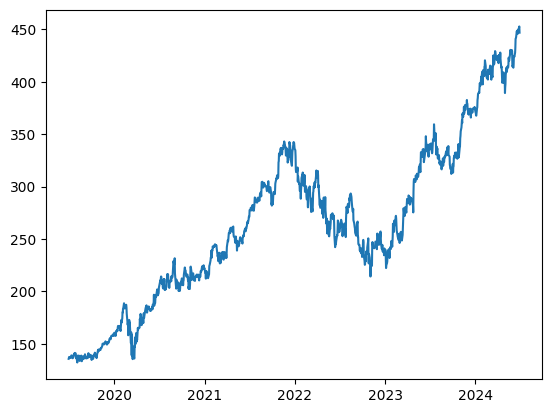

In [44]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [69]:
import numpy as np

# Func to create a df containing the date, three previous prices and the current price - the requirements of the LSTM model
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-07-06', 
                                '2023-06-28', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-07-06,270.899994,271.600006,277.649994,277.660004
1,2021-07-07,271.600006,277.649994,277.660004,279.929993
2,2021-07-08,277.649994,277.660004,279.929993,277.420013
3,2021-07-09,277.660004,279.929993,277.420013,277.940002
4,2021-07-12,279.929993,277.420013,277.940002,277.320007
...,...,...,...,...,...
494,2023-06-22,342.329987,338.049988,333.559998,339.709991
495,2023-06-23,338.049988,333.559998,339.709991,335.019989
496,2023-06-26,333.559998,339.709991,335.019989,328.600006
497,2023-06-27,339.709991,335.019989,328.600006,334.570007


In [70]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((499,), (499, 3, 1), (499,))

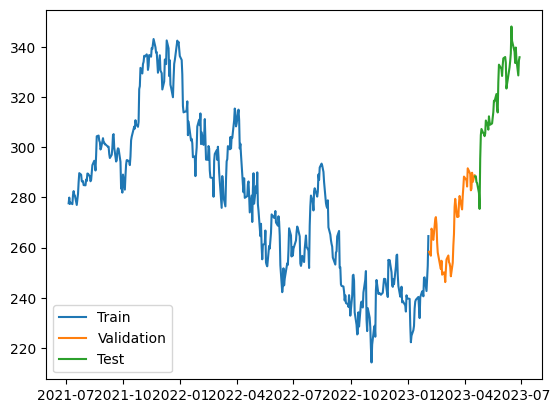

In [71]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150)

Epoch 1/150
13/13 [==============================] - 4s 49ms/step - loss: 78723.3672 - mean_absolute_error: 278.8238 - val_loss: 71377.5312 - val_mean_absolute_error: 266.8055
Epoch 2/150
13/13 [==============================] - 0s 7ms/step - loss: 77971.9062 - mean_absolute_error: 277.4741 - val_loss: 70657.7734 - val_mean_absolute_error: 265.4527
Epoch 3/150
13/13 [==============================] - 0s 8ms/step - loss: 76910.5391 - mean_absolute_error: 275.5504 - val_loss: 69160.7109 - val_mean_absolute_error: 262.6180
Epoch 4/150
13/13 [==============================] - 0s 8ms/step - loss: 74999.5781 - mean_absolute_error: 272.0696 - val_loss: 66916.0625 - val_mean_absolute_error: 258.3080
Epoch 5/150
13/13 [==============================] - 0s 8ms/step - loss: 72054.1641 - mean_absolute_error: 266.5820 - val_loss: 63379.8594 - val_mean_absolute_error: 251.3708
Epoch 6/150
13/13 [==============================] - 0s 8ms/step - loss: 68035.6328 - mean_absolute_error: 258.9482 - val_lo

13/13 [==============================] - 0s 3ms/step


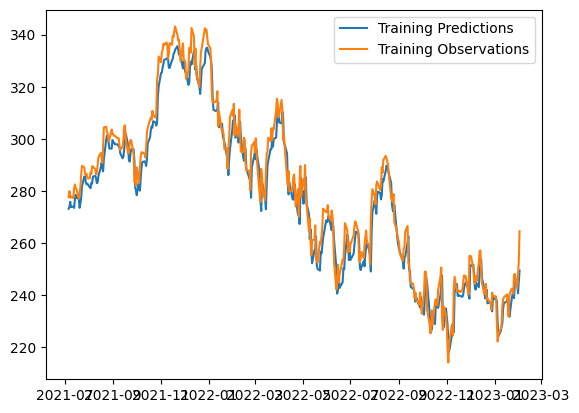

In [73]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 [==============================] - 0s 5ms/step


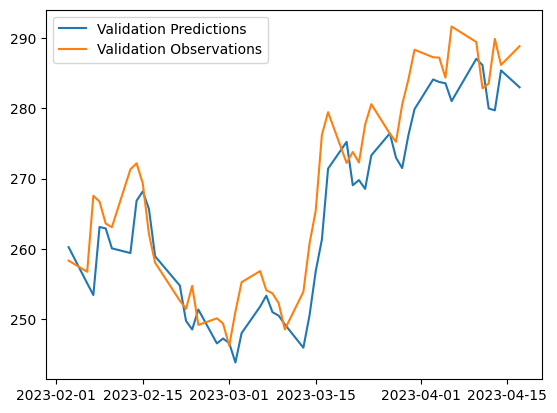

In [74]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 [==============================] - 0s 3ms/step


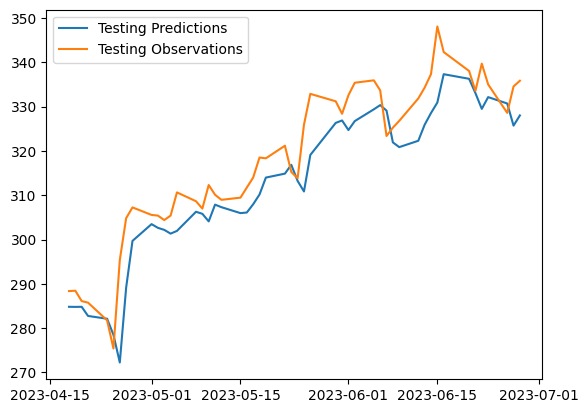

In [75]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

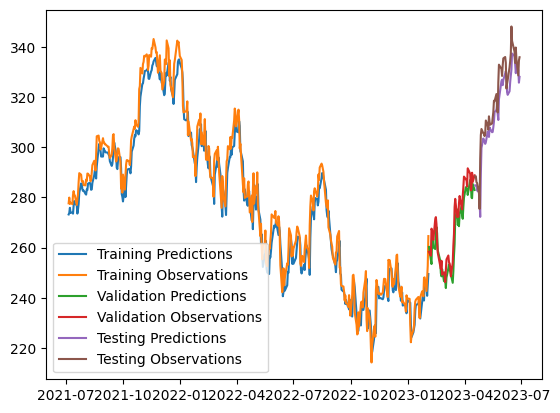

In [76]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [77]:
from copy import deepcopy

recursive_predictions = []

recursive_dates=np.concatenate([dates_val, dates_test])

last_window = deepcopy(X_train[-1])



for target_date in recursive_dates:

    next_prediction=model.predict(np.array([last_window[-3:]])).flatten()

    recursive_predictions.append(next_prediction)

    last_window=np.concatenate((last_window,[next_prediction]))

    #print(last_window)



print(recursive_predictions)

1/1 [==============================] - 0s 28ms/step
[array([249.48703], dtype=float32), array([246.7512], dtype=float32), array([244.32065], dtype=float32), array([242.1655], dtype=float32), array([240.28523], dtype=float32), array([238.66722], dtype=float32), array([237.29153], dtype=float32), array([236.13383], dtype=float32), array([235.16805], dtype=float32), array([234.36823], dtype=float32), array([233.70985], dtype=float32), array([233.17058], dtype=float32), array([232.73062], dtype=float32), array([232.37285], dtype=float32), array([232.08269], dtype=float32), array([231.84789], dtype=float32), array([231.6582], dtype=float32), array([231.50517], dtype=float32), array([231.38185], dtype=float32), array([231.28256], dtype=float32), array([231.20268], dtype=float32), array([231.13846], dtype=float32), array([231.08687], dtype=float32), array([231.04538], dtype=float32), array([231.01207], dtype=float32), array([230.98532], dtype=float32), array([230.96385], dtype=float32), array

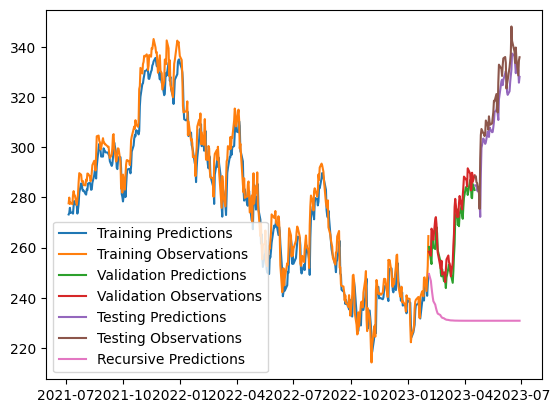

In [78]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])